# Binary Classification of Heart Disease of Patients using Deep Neural Network

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


2. SPLIT THE DATASET

In [ ]:
X=df.drop("target",axis=1)
y=df["target"]

In [ ]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(686, 13)

In [ ]:
y_train.shape

(686,)

In [ ]:
X_test.shape

(339, 13)

In [ ]:
y_test.shape

(339,)

3. Create a neural network

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model = Sequential()
model.add(Dense(8,input_dim=13,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

4.compile the model


In [ ]:
model.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer=RMSprop(0.001))


5.print the summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


6.Train the model

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=10,verbose=1)

Epoch 1/20
69/69 [==============================] - 2s 3ms/step - loss: 0.4781 - accuracy: 0.5219
Epoch 2/20
69/69 [==============================] - 0s 4ms/step - loss: 0.4781 - accuracy: 0.5219
Epoch 3/20
69/69 [==============================] - 0s 5ms/step - loss: 0.4781 - accuracy: 0.5219
Epoch 4/20
69/69 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.5219
Epoch 5/20
69/69 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.5219
Epoch 6/20
69/69 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.5219
Epoch 7/20
69/69 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.5219
Epoch 8/20
69/69 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.5219
Epoch 9/20
69/69 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.5219
Epoch 10/20
69/69 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.5219
Epoch 11/20
69/69 [

7.Save the trained model


In [ ]:
history = model.fit(X_train,y_train,epochs=20,batch_size=10,verbose=1,validation_split=0.2)

Epoch 1/20
55/55 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 3/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 5/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 6/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 7/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 8/20
55/55 [==

8.Evaluate

In [ ]:
model.evaluate(X_test,y_test)


11/11 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.4956


[0.5044247508049011, 0.4955752193927765]

9. Print the model accuracy

In [ ]:
import matplotlib.pyplot as plt

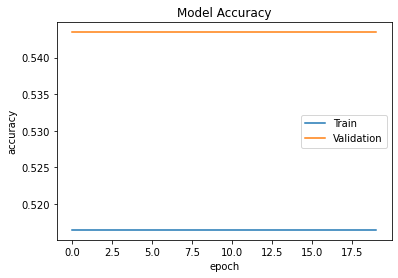

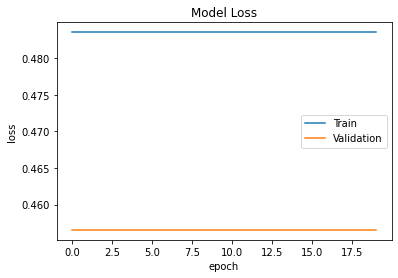

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

10. Do further experiments


Model 1

In [ ]:
model1 = Sequential()
model1.add(Dense(16,input_dim=13,activation='relu'))
model1.add(Dense(8,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))


In [ ]:
model1.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer=RMSprop(0.001))

In [ ]:
history1=model1.fit(X_train,y_train,epochs=20,batch_size=10,verbose=1,validation_split=0.2)

Epoch 1/20
55/55 [==============================] - 1s 5ms/step - loss: 0.3179 - accuracy: 0.6113 - val_loss: 0.3165 - val_accuracy: 0.6449
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.6825 - val_loss: 0.3021 - val_accuracy: 0.6087
Epoch 3/20
55/55 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.6916 - val_loss: 0.2990 - val_accuracy: 0.6594
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.6661 - val_loss: 0.2953 - val_accuracy: 0.6522
Epoch 5/20
55/55 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.7099 - val_loss: 0.2957 - val_accuracy: 0.6304
Epoch 6/20
55/55 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.6989 - val_loss: 0.3057 - val_accuracy: 0.6232
Epoch 7/20
55/55 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.7245 - val_loss: 0.2629 - val_accuracy: 0.6304
Epoch 8/20
55/55 [==

In [ ]:
model1.evaluate(X_test,y_test)


11/11 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.7522


[0.15765303373336792, 0.752212405204773]

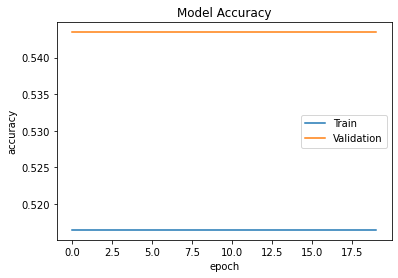

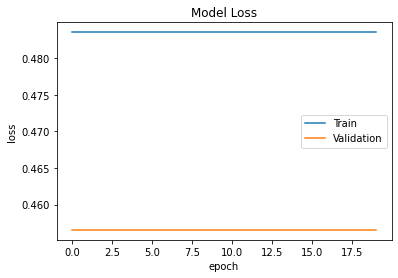

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

MODEL 2

In [ ]:
model2 = Sequential()
model2.add(Dense(32,input_dim=13,activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer=RMSprop(0.001))

In [ ]:
history2=model2.fit(X_train,y_train,epochs=20,batch_size=10,verbose=1,validation_split=0.2)

Epoch 1/20
55/55 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 3/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 5/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 6/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 7/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.5164 - val_loss: 0.4565 - val_accuracy: 0.5435
Epoch 8/20
55/55 [==

In [ ]:
model2.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.4956


[0.5044247508049011, 0.4955752193927765]

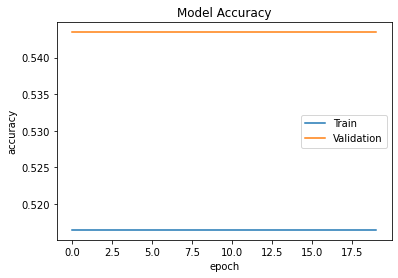

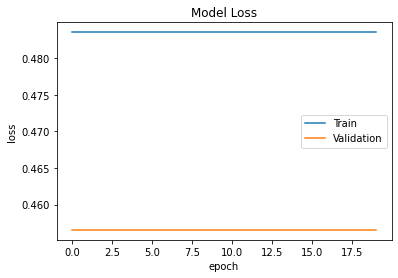

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()